In [27]:
import os
import csv
import re
import json
from datetime import datetime
import seaborn as sns

In [28]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.models import Model
from keras.layers import Activation
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import decode_predictions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras.models import model_from_json
import itertools
import matplotlib.pyplot as plt
import time
import pandas as pd
%matplotlib inline

In [29]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [30]:
clean_dataDirectory = "data/results/cleaned_data.csv"
standard_dataDirectory = "data/results/standardized_data.csv"
data = pd.read_csv(standard_dataDirectory)
# print(data.head(5))
data = data.dropna()

In [31]:
collum_list = data['num_bedrooms'][data['num_bedrooms'] >= 0]
# print(collum_list.mean())
data['num_bedrooms'] = data['num_bedrooms'].apply(lambda x: int(collum_list.mean()) if x < 0 else x)
data['num_bedrooms']

0         4
1         6
2         3
3        20
4         4
         ..
14605     6
14606     4
14607    10
14608    10
14609     6
Name: num_bedrooms, Length: 14601, dtype: int64

In [32]:
collum_list = data['num_bathrooms'][data['num_bathrooms'] >= 0]
# print(collum_list.mean())
data['num_bathrooms'] = data['num_bathrooms'].apply(lambda x: int(collum_list.mean()) if x < 0 else x)
data['num_bathrooms']

0         4
1         4
2         4
3        21
4         5
         ..
14605     6
14606     3
14607     9
14608     4
14609     6
Name: num_bathrooms, Length: 14601, dtype: int64

In [33]:
collum_list = data['num_floors'][data['num_floors'] >= 0]
# print(collum_list.mean())
data['num_floors'] = data['num_floors'].apply(lambda x: int(collum_list.mean()) if x < 0 else x)
data['num_floors']

0        8
1        5
2        5
3        9
4        5
        ..
14605    6
14606    4
14607    6
14608    7
14609    5
Name: num_floors, Length: 14601, dtype: int64

In [34]:
collum_list = data['entrance'][data['entrance'] >= 0]
# print(collum_list.mean())
data['entrance'] = data['entrance'].apply(lambda x: int(collum_list.mean()) if x < 0 else x)
data['entrance']

0         6.0
1         6.0
2         6.0
3         6.0
4         4.0
         ... 
14605     5.0
14606     3.0
14607     2.0
14608    40.0
14609     8.0
Name: entrance, Length: 14601, dtype: float64

In [35]:
collum_list = data['frontage'][data['frontage'] >= 0]
# print(collum_list.mean())
data['frontage'] = data['frontage'].apply(lambda x: int(collum_list.mean()) if x < 0 else x)
data['frontage']

0         5.4
1         5.0
2         5.0
3         5.0
4         3.4
         ... 
14605     3.8
14606     5.5
14607     3.5
14608    15.0
14609     5.2
Name: frontage, Length: 14601, dtype: float64

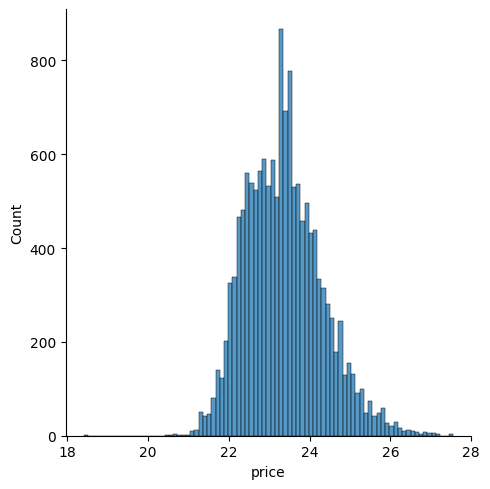

In [36]:
sns.displot(np.log(data['price']))
data['log_price'] = np.log(data['price'])

In [37]:
clean_train_data = data.drop(['price', 'price_per_sqm', 'log_price', 'pr_id', 'posted_date'], axis=1)
clean_train_label = data['price']
train_data, test_data, train_label, test_label = train_test_split(clean_train_data, clean_train_label, test_size=0.2, random_state=42)

In [56]:
model = Sequential()
model.add(Dense(128, input_dim=train_data.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(train_data, train_label, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100


d:\anaconda3\envs\ML\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2057840051571050676224.0000 - val_loss: 2430981717309670817792.0000
Epoch 2/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 2306153757587982516224.0000 - val_loss: 2430980591409763975168.0000
Epoch 3/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 2023260991419634941952.0000 - val_loss: 2430979184034880421888.0000
Epoch 4/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 2010336927126476816384.0000 - val_loss: 2430976369285113315328.0000
Epoch 5/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1949503429259862999040.0000 - val_loss: 2430973554535346208768.0000
Epoch 6/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 2115720173244527935488.0000 - val_loss: 2430969050935718838272.0000
Epoch 7/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 2216992336590231568384.0000 - val_loss: 2430963984386138046464.0000
Epoch 8/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 2533681240262274187264.0000 - val_lo

In [57]:
predict = model.predict(test_data)
print(test_label, predict)


92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
169      3.000000e+10
9357     3.350000e+09
3013     1.700000e+10
1475     9.500000e+09
7422     2.200000e+10
             ...     
740      6.800000e+09
3461     1.450000e+10
5183     5.900000e+10
1188     1.180000e+10
13096    3.405000e+10
Name: price, Length: 2921, dtype: float64 [[2.9721302e+08]
 [1.9154237e+08]
 [4.0559184e+08]
 ...
 [2.3611829e+08]
 [2.2990781e+08]
 [4.0534685e+08]]
